In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, 
                            summarize, 
                            poly)

In [2]:
dir() # to show objects in the namespace, i.e. python can find at the top level

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [3]:
A = np.array([3, 5, 11])
print("Is \"sum\" in dir(A)? %s" %str("sum" in dir(A)))
A.sum()

Is "sum" in dir(A)? True


19

# simple linear regression

In [4]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [5]:
# create the model matrix by hand
X = pd.DataFrame({"intercept": np.ones(Boston.shape[0]), # create an array of 1s, to tell the model to fit with an intercept term
                  "lstat": Boston["lstat"]})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [6]:
y = Boston["medv"]
model = sm.OLS(y, X) # specifies the model to be Ordinary Least Squares
results = model.fit() # perform the fit

In [7]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [8]:
# using transformations: fit and transform
design = MS(["lstat"]) # ModelSpec()
design = design.fit(Boston) # check "lstat" specified in design exists in Boston
X = design.transform(Boston) # construct the model matrix with 2 cols: intercept and lstat
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [9]:
design = MS(["lstat"])
X = design.fit_transform(Boston) # combine fit and transform
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [10]:
y = Boston["medv"]
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 14 May 2024   Prob (F-statistic):           5.08e-88
Time:                        11:53:43   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [12]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 

In [13]:
new_df = pd.DataFrame(
    {"lstat": [5, 10, 15]}
)
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [14]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [15]:
# CI for the predicted values
new_predictions.conf_int(alpha = 0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [16]:
# prediction interval, use obs = True (observation?)
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [17]:
# function to add regression line to a graph
def abline(ax, b, m, *args, **kwargs): # adding *args and **kwargs let this function implement more features when calling ax.plot()
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

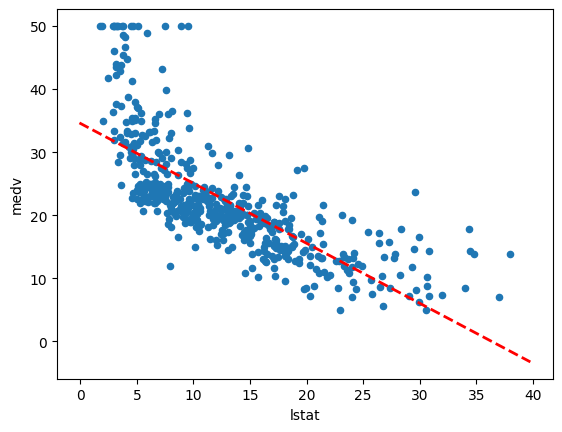

In [18]:
ax = Boston.plot.scatter("lstat", "medv")
abline(ax, 
       results.params[0], # intercept
       results.params[1], # slope
       "r--", # produce a red dashed line, so a solid line should be "-"
       linewidth = 2)

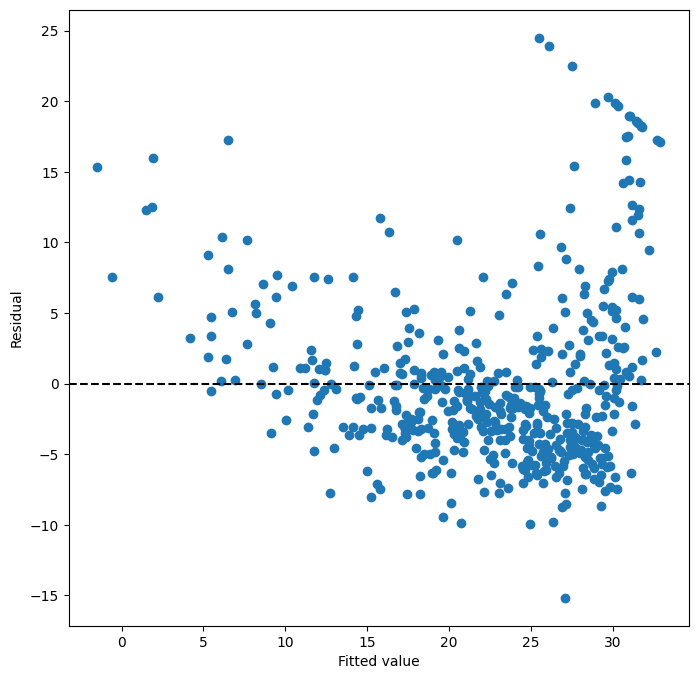

In [19]:
# diagnostic plots
# fig, ax = subplots(figsize = (8, 8))
ax = subplots(figsize = (8, 8))[1] # we do not need the fig object now
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel("Fitted value")
ax.set_ylabel("Residual")
ax.axhline(0, c = "k", ls = "--") # ax horizontal line at y = 0; col = black; line style = "--"

374

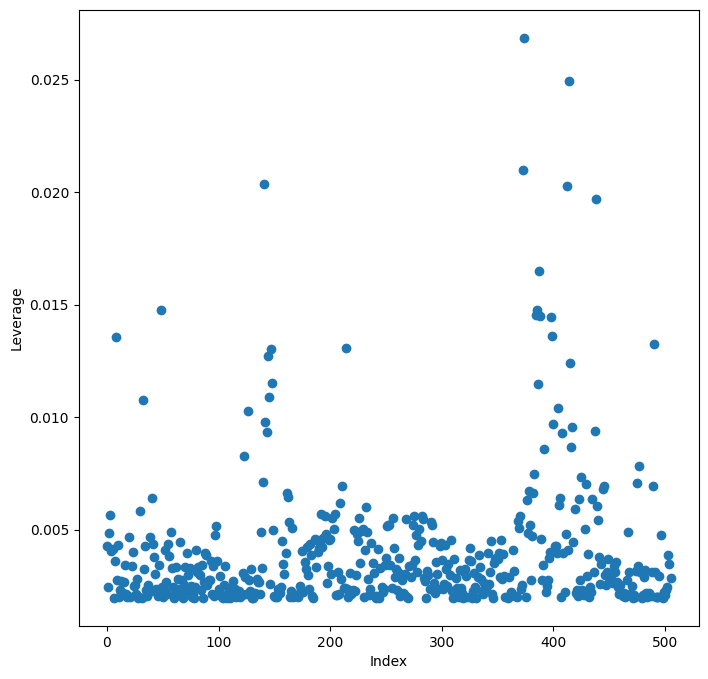

In [20]:
infl = results.get_influence()
ax = subplots(figsize = (8, 8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage")
np.argmax(infl.hat_matrix_diag) # identify the index of the largest element of an array

# multiple linear regression

In [21]:
# 1. use ModelSpec() to construct the model matrix
X = MS(["lstat", "age"]).fit_transform(Boston)
# 2. specify y = Boston["medv"] (done previously)
y = Boston["medv"]
# 3. specify the model to be Ordinary Least Squares (a type of linear regression)
model1 = sm.OLS(y, X)
# 4. call model.fit() to fit
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [22]:
terms = Boston.columns.drop("medv")
X = MS(terms).fit_transform(Boston)
model2 = sm.OLS(y, X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [23]:
# since "age" in the multiple linear regression model has large p-value
# we exclude this predictor and run again
minus_age = Boston.columns.drop(["medv", "age"])
X_m_a = MS(minus_age).fit_transform(Boston)
model3 = sm.OLS(y, X_m_a)
summarize(model3.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


# multivariate goodness of fit

In [24]:
results3 = model3.fit()
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 

In [25]:
# calculating variance inflation factor
vals = [VIF(X, i) # variance_inflation_factor() for each of the variables in X
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({"vif": vals}, 
                   index = X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [26]:
# use loop, the same as list comprehension 
vals = []
for i in range(1, X.values.shape[1]): 
    vals.append(VIF(X.values, i)) 
vif = pd.DataFrame({"vif": vals}, 
                   index = X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [27]:
# interaction terms 
X = MS(["lstat", 
        "age", 
        ("lstat", "age")]).fit_transform(Boston)
model4 = sm.OLS(y, X)
summarize(model4.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


# Non-linear transformations of the predictors

In [28]:
# poly() generates a model matrix with orthogonal polynomial columns
X = MS([poly("lstat", degree = 2), "age"]).fit_transform(Boston)
model5 = sm.OLS(y, X)
results5 = model5.fit()
summarize(results5)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [29]:
# results1 is the multiple linear regression model of lstat and age against medv
anova_lm(results1, results5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


In [30]:
# cubic
X = MS([poly("lstat", degree = 3), "age"]).fit_transform(Boston)
model6 = sm.OLS(y, X)
results6 = model6.fit()
anova_lm(results5, results6)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,502.0,14165.613251,0.0,NaN,NaN,NaN
1,501.0,13594.619618,1.0,570.993633,21.042723,0.000006


Text(0.5, 1.0, 'quatratic: residual vs. fitted vals')

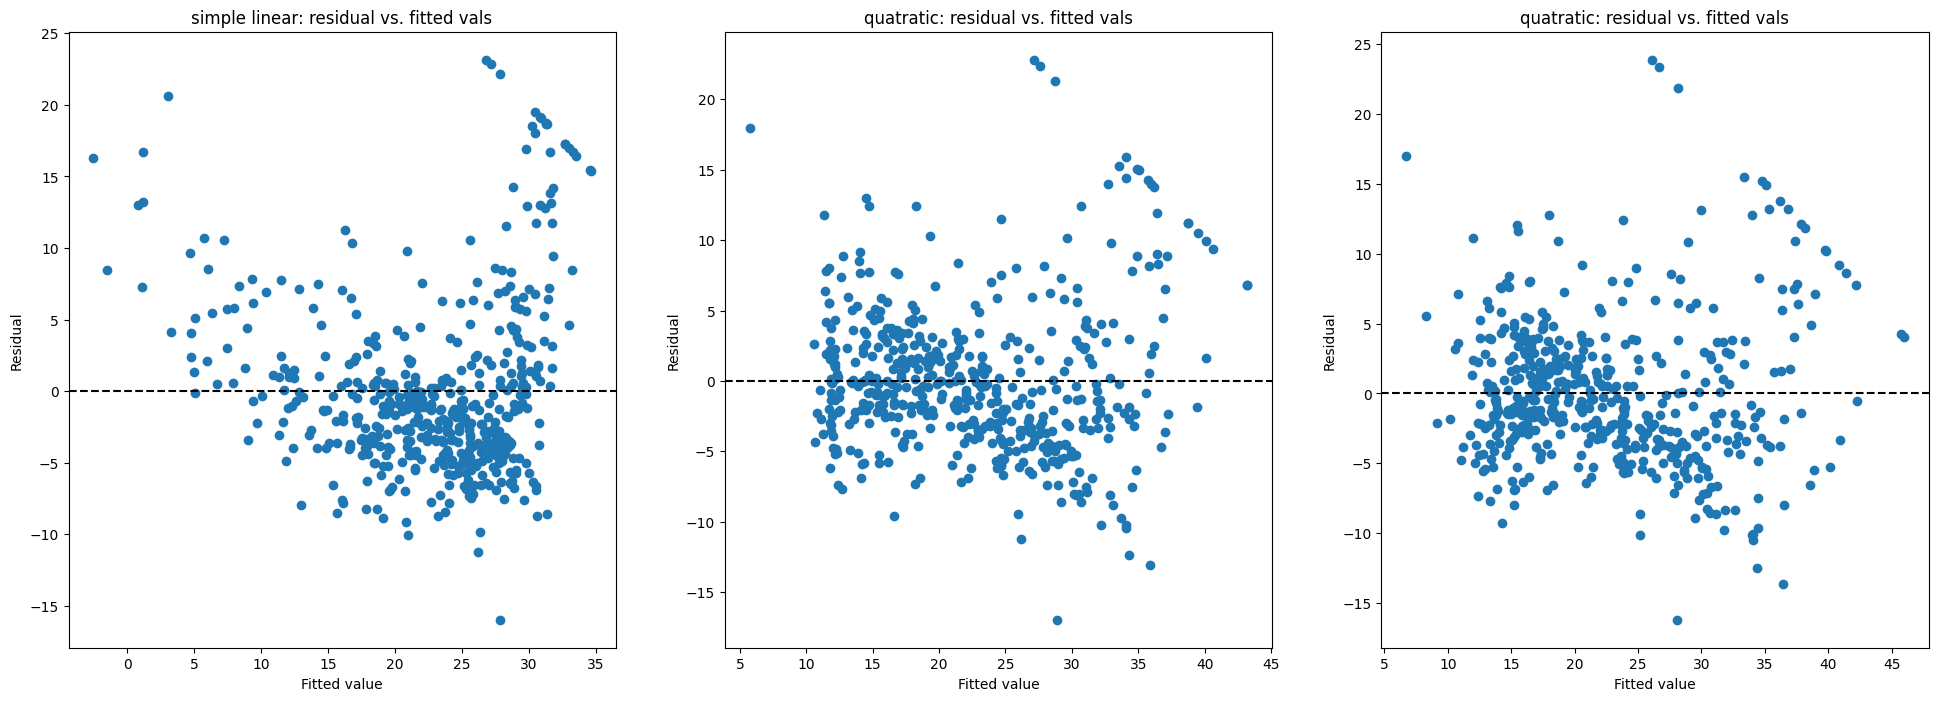

In [31]:
axes = subplots(1, 3, figsize = (24, 8))[1]
ax_linear = axes[0]
ax_linear.scatter(results1.fittedvalues, results1.resid)
ax_linear.set_xlabel("Fitted value")
ax_linear.set_ylabel("Residual")
ax_linear.axhline(0, c = "k", ls = "--")
ax_linear.set_title("simple linear: residual vs. fitted vals")
ax_quadratic = axes[1]
ax_quadratic.scatter(results5.fittedvalues, results5.resid)
ax_quadratic.set_xlabel("Fitted value")
ax_quadratic.set_ylabel("Residual")
ax_quadratic.axhline(0, c = "k", ls = "--")
ax_quadratic.set_title("quatratic: residual vs. fitted vals")
ax_cubic = axes[2]
ax_cubic.scatter(results6.fittedvalues, results6.resid)
ax_cubic.set_xlabel("Fitted value")
ax_cubic.set_ylabel("Residual")
ax_cubic.axhline(0, c = "k", ls = "--")
ax_cubic.set_title("quatratic: residual vs. fitted vals")

# qualitative predictors

In [32]:
Carseats = load_data("Carseats")
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [33]:
# generate dummy variables automatically using one-hot encoding, i.e. red[1, 0, 0], blue[0, 1, 0], yellow[0, 0, 1]
all_vars = list(Carseats.columns.drop("Sales"))
y = Carseats["Sales"]
final_vars = all_vars + [("Income", "Advertising"), 
                         ("Price", "Age")] # adding interaction
X = MS(final_vars).fit_transform(Carseats)
model7 = sm.OLS(y, X)
summarize(model7.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288
